In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import itertools
import mdnet 
import os

#### Load Data ( .prmtop and .nc should be present)

In [2]:
data_dir = "/home/aaojha/Downloads/data_for_mdnet"
traj_file = os.path.join(data_dir, "traj.nc")
top = os.path.join(data_dir, "system.prmtop")

In [3]:
heavy_atoms_file = os.path.join("heavy_atoms_md.txt")
phi_psi_file = os.path.join("phi_psi_md.txt")

In [4]:
mdnet.create_heavy_atom_xyz_solvent(traj = traj_file, top = top, 
                                    heavy_atoms_array = heavy_atoms_file, 
                                    start = 0, stop = 25000, stride = 1)

mdnet.create_phi_psi_solvent(traj = traj_file, top = top, phi_psi_txt = phi_psi_file, 
                             start = 0, stop = 25000, stride = 1)

<mdtraj.Trajectory with 25000 frames, 22 atoms, 3 residues, and unitcells>
<mdtraj.Topology with 1 chains, 3 residues, 22 atoms, 21 bonds>
[1, 4, 5, 6, 8, 10, 14, 15, 16, 18]
<mdtraj.Trajectory with 25000 frames, 10 atoms, 3 residues, and unitcells>
(25000, 10, 3)
(25000, 30)
(25000, 1)
(25000, 1)
(25000, 2, 1)
(25000, 2)


In [5]:
traj_whole = np.loadtxt(heavy_atoms_file)
print(traj_whole.shape)
dihedral = np.loadtxt(phi_psi_file)
print(dihedral.shape)

(25000, 30)
(25000, 2)


## EM Clustering Algorithm

In [6]:
traj_data = traj_whole # data to be used as input to GMM, can be with dihedrals or without dihedrals

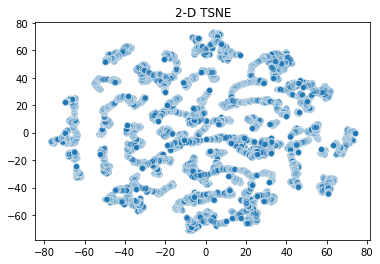

In [7]:
tsne_dims = mdnet.tsne_visualize(traj_data)

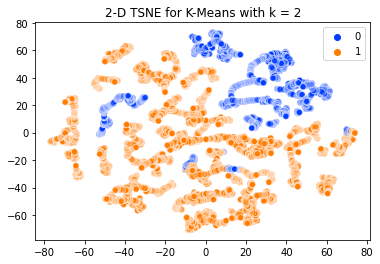

For 2 clusters, score is 0.758388 


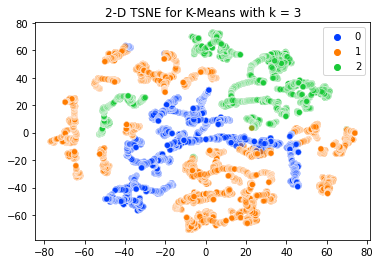

For 3 clusters, score is 1.059696 


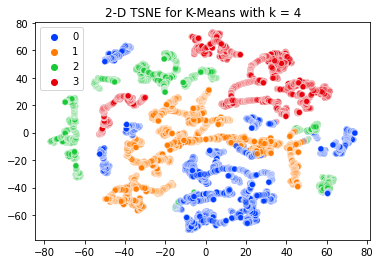

For 4 clusters, score is 0.953223 


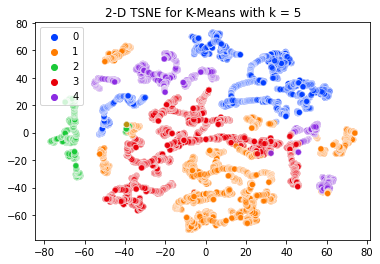

For 5 clusters, score is 0.792972 


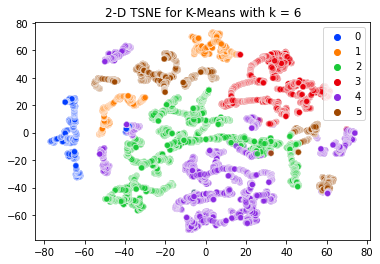

For 6 clusters, score is 0.872720 


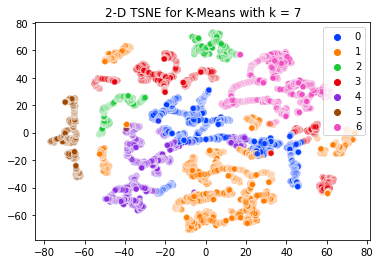

For 7 clusters, score is 0.939902 


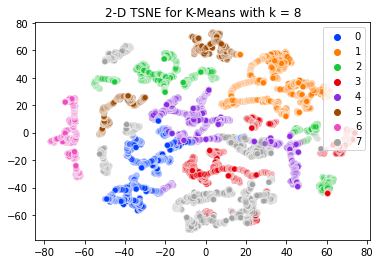

For 8 clusters, score is 1.014676 


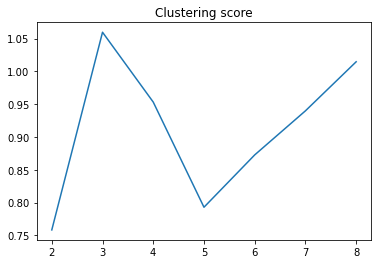

(25000, 3)


In [8]:
# K-Means Clustering and Gaussian Mixture Model
num_clusters = mdnet.experiment_with_k_means(traj_data, tsne_dims)
posterior_probabs = mdnet.gmm(traj_data, num_clusters)

In [9]:
indices, labels = mdnet.get_clustered_indices(traj_data, posterior_probabs, 
                                              num_traj_indices = 50)
print(indices.shape[0])
np.savetxt("indices_dihed.txt", indices)

50


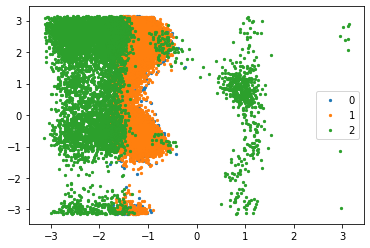

In [10]:
fig, ax = plt.subplots()
for i in range(num_clusters[0][0]+2):
    coor_train = np.where(labels == i)[0]
    ax.scatter(dihedral[coor_train,0], dihedral[coor_train,1], s=5, label=i)
ax.legend()
plt.axes = [[-np.pi, np.pi],[-np.pi, np.pi]]
plt.savefig(os.path.join(data_dir, "RC.jpeg"))
plt.show()

States population: [17.552 55.64  26.808]%


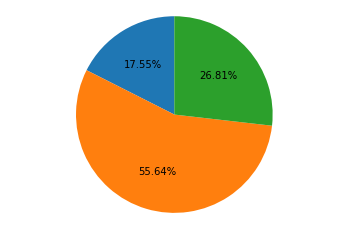

In [11]:
def print_states_pie_chart():
    labels_final = np.argmax(posterior_probabs, axis = 1)
    coors = np.bincount(labels_final)
    fig1, ax1 = plt.subplots()
    ax1.pie(np.array(coors), autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    print('States population: '+ str(np.array(coors)/len(labels_final)*100)+'%')
    plt.savefig(os.path.join(data_dir, "population.jpeg"))
    plt.show()
print_states_pie_chart()